In [40]:
%matplotlib inline

# Bitcoin Frame Analysis

This notebook explores the prominence and evolution of the metaphors, frames, and narratives used to when discussing Bitcoin.

**Frames, Metaphors, Narratives, Memes**:
* currency: money, medium of exchange, FX, etc.
* gold rush: pick axes, etc.
* internet protocol: early internet, TCP/IP, etc.
* ponzi scheme: pyramid scheme, etc.
* tulip mania: bubble, craze, mania, madness of crowds, beanie babies, etc.
* physical gold: limited supply, scarce, etc.
* investment: asset, etc.
* gambling: speculation, lottery, etc.
* darknet: silk road, criminals, drugs, etc.

Others that we might consider including:
* distributed ledger: database (should we distinguish?)

Words/phrases that would match multiple frames:
* store of value: overlaps with currency and physical gold

**Known Issues:**
* We make no attempt to detect if someone is refuting a metaphor (or invoking the metaphor sarcastically)
* Some of the frames are related, e.g., physical gold and asset. These will often co-occur in comments. We can decide later if we want to combine them. We just have to make sure we don't end up double counting, if we do
* "gold" will pick up references to Reddit gold (magnitude)
* Current "IP" rule will pick up "BIP" (Bitcoin Improvement Proposal)
* Need to match Reddit data vs known bots

**Sanity Checks (TODO):**
* Check how score histogram shape compares to general comment shape
* Check the effect of moderation policies (e.g., modding post calling it a tulip bubble)

In [301]:
import pandas as pd
from pandas.io import gbq
import matplotlib.pyplot as plt
import math

In [302]:
project_id = 'open-synthesis'

In [156]:
def make_rules(body):
    return f"""
(REGEXP_CONTAINS({body}, "currency") or REGEXP_CONTAINS({body}, "medium of exchange")) as currency, 
(REGEXP_CONTAINS({body}, "gold") and not REGEXP_CONTAINS({body}, "gold ?rush")) as gold, 
(REGEXP_CONTAINS({body}, "tulip") or REGEXP_CONTAINS({body}, "bubble")) as tulip, 
(REGEXP_CONTAINS({body}, "ponzi") or REGEXP_CONTAINS({body}, "pyramid scheme")) as ponzi,
(REGEXP_CONTAINS({body}, "gold ?rush") or REGEXP_CONTAINS({body}, "pick ?axe?")) as gold_rush, 
(REGEXP_CONTAINS({body}, "invest") or REGEXP_CONTAINS({body}, "asset")) as invest,
(REGEXP_CONTAINS({body}, "internet protocol") or REGEXP_CONTAINS({body}, "IP")) as internet,
(REGEXP_CONTAINS({body}, "gambling") or REGEXP_CONTAINS({body}, "speculation") or REGEXP_CONTAINS({body}, "lottery")) as gambling,  
"""  

def make_reddit_comments_query(table_name):
    return f"""
SELECT 
  score, 
  {make_rules('body')}
  body
FROM `open-synthesis.frame.{table_name}`
WHERE score > 0
"""

hn_comments_query = f"""
SELECT 
  ranking, 
  {make_rules('text')}
  text
FROM `open-synthesis.frame.hn_bitcoin_comments`
WHERE ranking > 0
"""



In [150]:
bitcoin_comments_2017 = gbq.read_gbq(make_reddit_comments_query('reddit_bitcoin_comments'), project_id=project_id, dialect='standard')
bitcoin_comments_2016 = gbq.read_gbq(make_reddit_comments_query('reddit_bitcoin_comments_2016_09'), project_id=project_id, dialect='standard')

NameError: name 'make_reddit_comments_query' is not defined

In [157]:
hn_comments_all = gbq.read_gbq(hn_comments_query, project_id=project_id, dialect='standard')

Requesting query... ok.
Job ID: job_enMMLCxRybSp-d0U-yKPrFagI9q3
Query running...
Query done.
Processed: 24.1 MB
Standard price: $0.00 USD

Retrieving results...
  Got page: 1; 96% done. Elapsed 8.84 s.
  Got page: 2; 100% done. Elapsed 9.56 s.
Got 22203 rows.

Total time taken 10.25 s.
Finished at 2017-10-27 22:40:16.


In [303]:
pd.options.display.max_colwidth = 150
bitcoin_comments_2016.query('currency==True')[['score', 'body']][0:10]

,score,body
27,1,Is there any data on what % of transactions are suspected to be related to terrorism?\n\nIs there any data contrast with Bitcoin Terror Funding vs...
34,1,"Bitcoin, the Donald Trump of currency."
87,1,Great to see this thread. I have a BA in Economics and taught A level as an unqualified teacher for a few years.\n\nIn the process of teaching Key...
180,1,"If you are a vendor in the EU, you will have to register for VAT if your gross sales are over a threshold in your own currency (e.g. UK is £83,000..."
201,1,"Well that's the point, a deflationary currency will encourage people to only produce the bare minimum required to survive. All other resources wou..."
220,1,Well the 20min delay in communication between mars and earth will make any kind of cryptocurrency commun to earth and mars impossible..\n\nOr with...
246,1,"Powering military bases, burning jet fuel, and mining/processing rare radioactive elements to supply the thermonuclear arsenal is probably not gre..."
345,1,"Good presentation overall, but most of the people I know who are completely ignorant of cryptocurrency wouldn't take away much from this other tha..."
355,1,#USE [LOCALBITCOINS](https://localbitcoins.com/instant-bitcoins/?action=buy&amp;country_code=US&amp;amount=&amp;currency=USD&amp;ch=5w05&amp;onlin...
369,1,I don't think the fee market will ever emerge. You can only raise fees so much before everybody starts using a cheaper currency and current miners...


In [167]:
hn_comments_all

,ranking,currency,gold,tulip,ponzi,gold_rush,invest,internet,gambling,text
0,3,False,False,False,False,False,True,False,False,Some of us wish that the IRS would also concern itself with US states and territories only.<p>The essence is that the IRS is going to invest in a ...
1,3,False,False,False,False,False,True,False,False,"&gt;<i>Bitcoin is possibly the most valueless asset in history. If people no longer wish to hold or accept Bitcoin, the value will be exactly zero..."
2,3,False,False,False,False,False,True,False,False,"For those wondering why we don't have a Bitcoin ETF, this is one reason. Making a reliable market in decentralised and pseudonymous Bitcoins witho..."
3,3,False,False,False,False,False,True,False,False,I need to learn about bitcoin investing but I&#x27;m almost computer illiterate. Does that exclude me?
4,3,False,False,False,False,False,True,False,False,<i>&quot;Sources also tell me that multiple investors who were approached restricted their own employees from buying or selling bitcoin themselves...
5,3,False,False,False,False,False,True,False,False,"Unlike other currencies, Bitcoin is limited in supply and produces a set amount every 10 minutes - as a result there is the potential for a liquid..."
6,4,False,False,True,False,False,True,False,False,Quote from the article: <i>Bitcoin mining is not valuable for anything other than creating Bitcoins. Bitcoin is possibly the most valueless asset ...
7,4,False,False,False,False,False,True,False,False,Fingerprints requirement sounds a bit ludicrous. Is this standard practice applied to other financial services companies?<p>Capital requirement is...
8,4,False,False,False,False,False,True,False,False,&gt; These companies are just straight converting BTC back to USD which in the long run does nothing positive for true widespread adoption of bitc...
9,4,False,False,True,False,False,True,False,False,"The buyers are mostly China. 1 bitcoin is currently trading at $770 (¥4700) on <a href=""https://btcchina.com"" rel=""nofollow"">https:&#x2F;&#x2F;btc..."


In [168]:
metaphors = ['invest', 'currency', 'gold', 'tulip', 'internet', 'gambling', 'ponzi', 'gold_rush'] 
def score_histogram(df, score_field='score'):
    data = {
        m: [math.log10(v) for v in df.query(f'{m}==True and {score_field} >= 1')[[score_field]][score_field].values]
        for m in metaphors
    }
    plt.figure(figsize=(7, 7))
    plt.hist(data.values(), stacked=True, label=metaphors, log=True)
    plt.legend()
    return plt

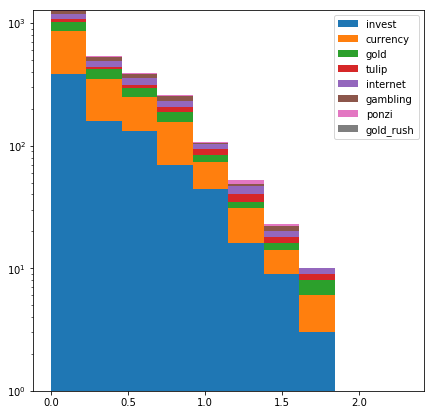

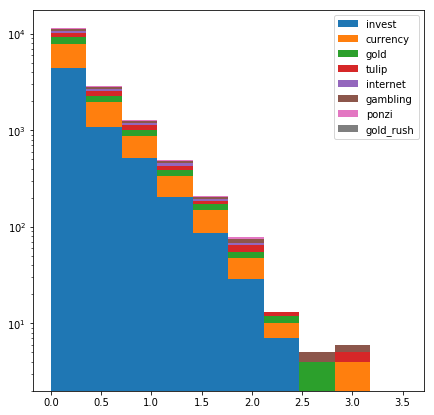

In [169]:
score_histogram(bitcoin_comments_2016);
score_histogram(bitcoin_comments_2017);

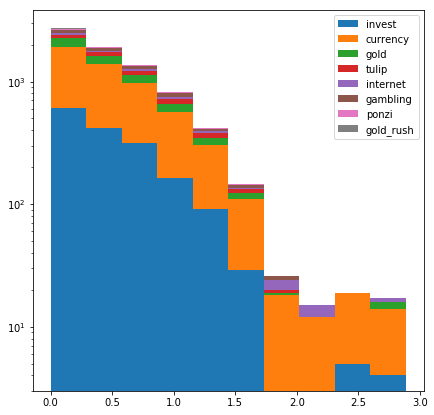

In [170]:
score_histogram(hn_comments_all, score_field='ranking');

Findings:
* HN: frame of Bitcoin as internet protocol is stronger at the high end
* Reddit: tulip mania and gambling share decent mindshare at the top end, whereas they don't in HN
* Reddit: mindshare of bitcoin as internet protocol dropped a bit

Looking for natural breaks to determine natural bounds HN comment ranks:

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    9.,   13.,
         21.,  769.])

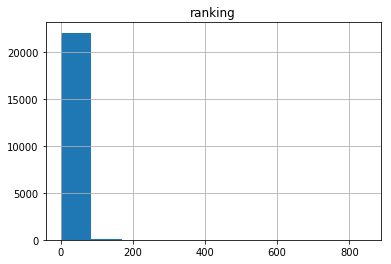

In [295]:
hn_comments_all.hist(column='ranking', bins=10);

query = f'ranking >= 1 and ({" or ".join([f"{m}==True" for m in metaphors])})'
out, bin = pd.qcut(hn_comments_all.query(query).ranking.values, 20, duplicates='drop', retbins=True)
bin

There's so many comments at the low end that there's not any obvious statistical breaks.

      invest  currency  gold  tulip  internet  gambling  ponzi  gold_rush
high      76       206    31     18        16        18      4          1
low      834      1863   427    243       101       227     70          9
med      122       311    59     55        19        36     14          1
zero     605      1306   352    149        78       160     53          8
         invest   currency       gold     tulip  internet  gambling     ponzi  \
high  20.540541  55.675676   8.378378  4.864865  4.324324  4.864865  1.081081   
low   22.098569  49.364070  11.314255  6.438792  2.676206  6.014838  1.854796   
med   19.773096  50.405186   9.562399  8.914100  3.079417  5.834684  2.269044   
zero  22.316488  48.174105  12.984139  5.496127  2.877167  5.901881  1.954998   

      gold_rush  
high   0.270270  
low    0.238474  
med    0.162075  
zero   0.295094  


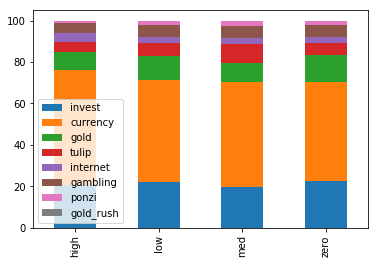

In [300]:
labels = ["zero", "low", "med", "high"]
# just kind of picking some arbitrary cutoffs for now
bins = [0, 1, 10, 20, 844]

def make_binned(m, f='ranking'):
    binned = pd.cut(hn_comments_all.query(f'{m}==True and {f} >= 1')[f].values, bins, labels=labels)
    return {b: len([v for v in binned if v == b]) for b in labels}

df = pd.DataFrame.from_dict([make_binned(m) for m in metaphors])
df = df.transpose()
df.columns = metaphors
df.rows = labels

print(df)

df['total'] = df[metaphors].sum(axis=1)
df = df.div(df.total, axis='index') * 100
df = df.drop(['total'], axis=1)

print(df)

df.plot.bar(stacked=True);

Discussion
* **Statistical Tests:** Since we're looking at the entire population, it doesn't make sense to compute a statistical test. But if we were, the null hypothesis would be that relative prominance of each metaphor is consistent across the ranking groups. For example is the difference between golds 8% prominance in the high group vs. 11-12% in the low/medium groups significant?
* Interesting that the Tulip and Ponzi frame is relatively more prominent in the medium band




